In [22]:
# Import Modules from the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I recommend to familiarize yourself with reading the documentations of the various open source libraries. Usually they're fairly readible and helpful.

https://numpy.org/doc/stable/ \
https://matplotlib.org/ \
https://pandas.pydata.org/docs/

### First we need to sample some Data:

In [23]:
# Seed of the Random Number Generator
np.random.seed(1001)

In [24]:
# Data Generating Function
def f(x, sigma=0.3):
    return np.sin(2. * x * np.pi) + np.random.randn(x.shape[-1])*sigma

In [25]:
f(x_data)

NameError: name 'x_data' is not defined

In [26]:
# Training Data
N_data = 10
x_data = np.linspace(0, 1., N_data)
y_data = np.sin(2. * x_data * np.pi) + np.random.randn(N_data)*0.3
#y_data = f(x_data)

In [27]:
x_data

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [28]:
y_data


array([-0.32593391,  0.37396807,  0.89291794,  0.46404531, -0.01995553,
       -0.53453819, -0.47364171, -0.43116962, -0.39405313, -0.00698964])

In [29]:
# Test Data
N_test = 10
x_test = np.random.rand(10)
y_test = np.sin(2. * x_test * np.pi) + np.random.randn(N_test)*0.3
#y_test = f(x_test)

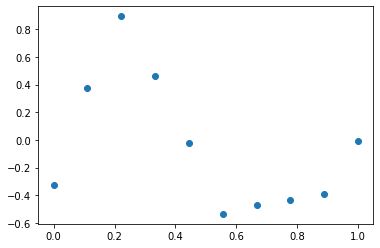

In [30]:
# Simple Plotting with Matplotlib
plt.plot(x_data, y_data, 'o')
#plt.plot(x_test, y_test, 'x', color="purple")

In [31]:
# Create an array of 101 evenly spaced data points between 0 and 1
x = np.linspace(0, 1, 101)

In [32]:
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [33]:
x.shape

(101,)

In [34]:
# Let's visualize the Sampled Data
y_true = np.sin(2. * x * np.pi)
y_upper = np.sin(2. * x * np.pi) + 0.3
y_lower = np.sin(2. * x * np.pi) - 0.3

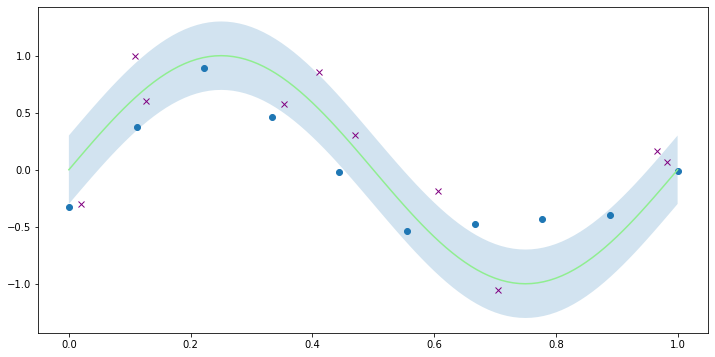

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_data, y_data, 'o')
plt.plot(x_test, y_test, 'x', color="purple")
ax.plot(x, y_true, '-', color="lightgreen")
ax.fill_between(x, y_upper, y_lower, alpha=0.2)

### Now we can create a simple Regression Model:

In [36]:
M = 3 # this will determine the capacity of our model
X_data = np.vander(x_data, M) # Vandermonde matrix: (x^(M-1), ... , x^2, x^1, 1)

In [37]:
X_data

array([[0.        , 0.        , 1.        ],
       [0.01234568, 0.11111111, 1.        ],
       [0.04938272, 0.22222222, 1.        ],
       [0.11111111, 0.33333333, 1.        ],
       [0.19753086, 0.44444444, 1.        ],
       [0.30864198, 0.55555556, 1.        ],
       [0.44444444, 0.66666667, 1.        ],
       [0.60493827, 0.77777778, 1.        ],
       [0.79012346, 0.88888889, 1.        ],
       [1.        , 1.        , 1.        ]])

In [38]:
W, residuals, rank, s = np.linalg.lstsq(X_data, y_data, rcond=None)

In [39]:
s

array([3.78792734, 1.21169636, 0.1972518 ])

In [40]:
W

array([-0.07753162, -0.60176282,  0.28262601])

In [41]:
residuals


array([1.61922097])

In [42]:
rank

3

In [43]:
X = np.vander(x, M)

In [44]:
y_predicted = X @ W

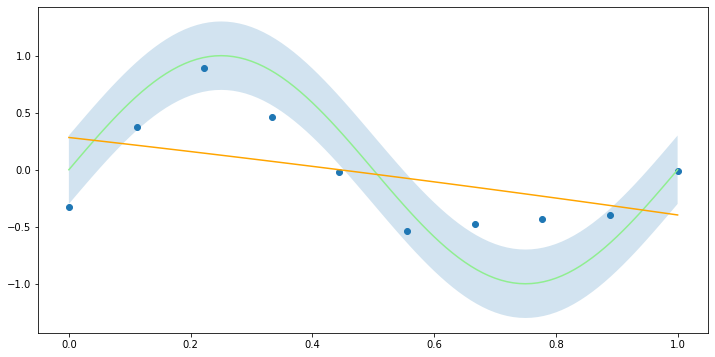

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_data, y_data, 'o')
ax.plot(x, y_true, '-', color="lightgreen")
ax.fill_between(x, y_upper, y_lower, alpha=0.2)
ax.plot(x, y_predicted, "-", color="orange")

### Now let's create and visualize a whole bunch of Regression Models with varying Capacities:

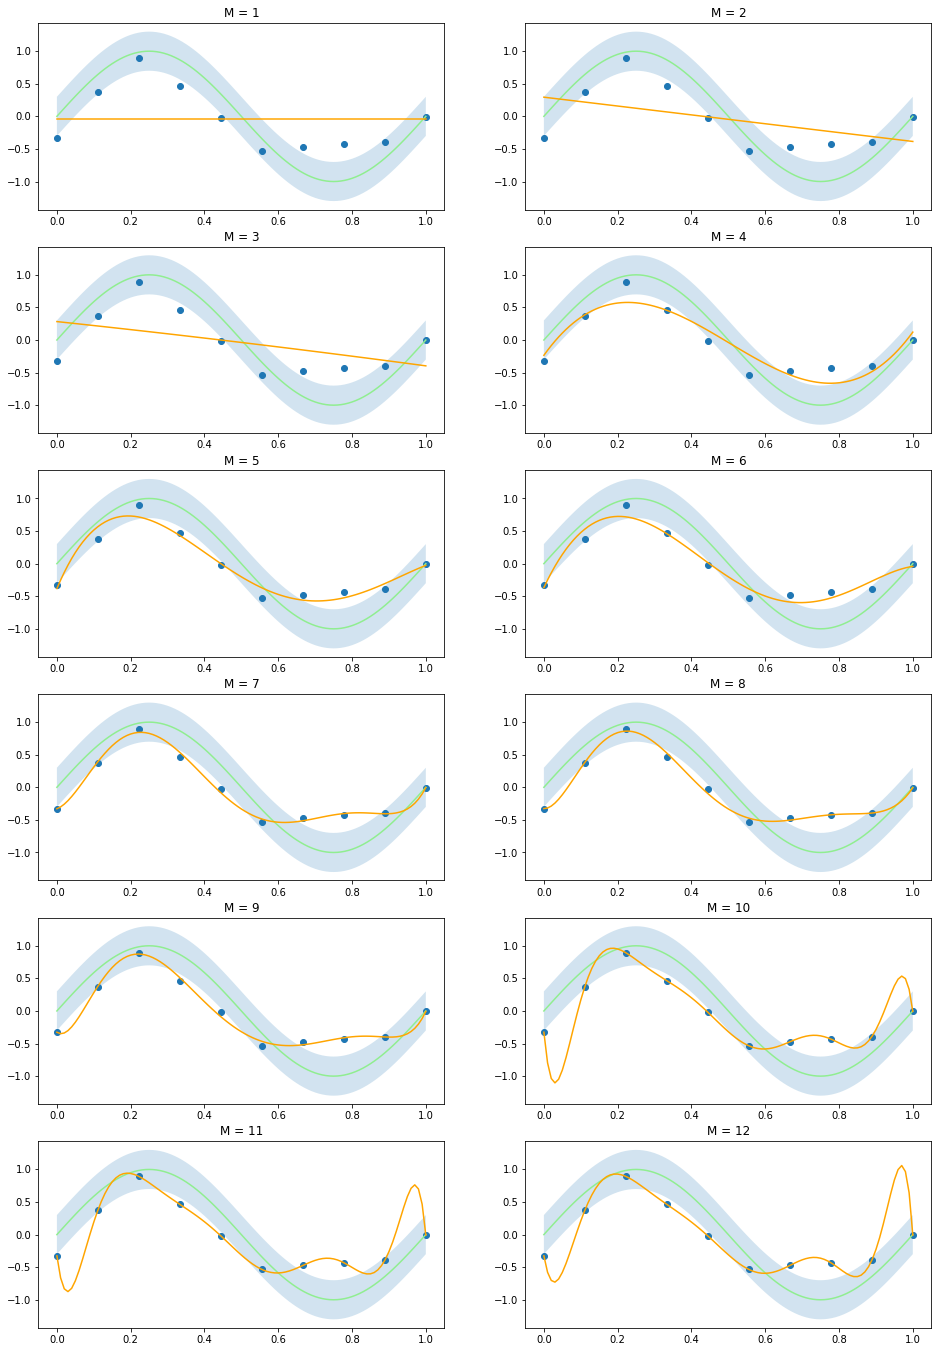

In [46]:
n_cols = 2
n_rows = 6

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16,24))

weights = []
train_mse = []
test_mse = []

for i in range(n_rows*n_cols):
    M = i + 1
    row = i // n_cols
    col = i % n_cols
    
    X_data = np.vander(x_data, M)
    W, residuals, rank, s = np.linalg.lstsq(X_data, y_data, rcond=None)
    weights.append(W)
    y_data_pred = X_data @ W
    train_mse.append( np.sum(np.power(y_data - y_data_pred, 2)) / N_data )

    
    X_test = np.vander(x_test, M)
    y_test_pred = X_test @ W
    test_mse.append( np.sum(np.power(y_test - y_test_pred, 2)) / N_test )
    
    X = np.vander(x, M)
    y_predicted = X @ W
    
    axes[row, col].plot(x_data, y_data, 'o')
    axes[row, col].plot(x, y_true, '-', color="lightgreen")
    axes[row, col].fill_between(x, y_upper, y_lower, alpha=0.2)
    axes[row, col].plot(x, y_predicted, "-", color="orange")
    axes[row, col].set_title(f"M = {M}")

Text(0, 0.5, 'Mean Squared Error (MSE)')

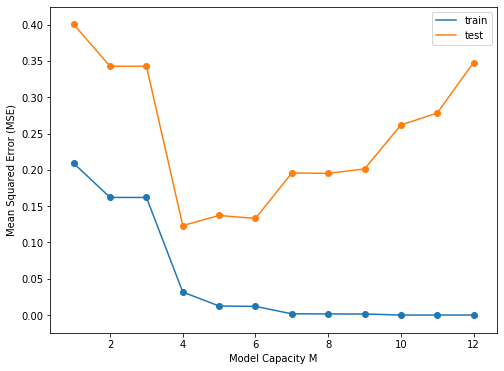

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(1, 13), train_mse, label="train")
ax.plot(np.arange(1, 13), test_mse, label="test")
ax.scatter(np.arange(1, 13), train_mse)
ax.scatter(np.arange(1, 13), test_mse)
ax.legend()
ax.set_xlabel("Model Capacity M")
ax.set_ylabel("Mean Squared Error (MSE)")

In [48]:
residuals

array([], dtype=float64)

In [49]:
weights


[array([-0.04553504]),
 array([-0.67929445,  0.29411218]),
 array([-0.07753162, -0.60176282,  0.28262601]),
 array([ 14.97286561, -22.53683004,   7.91983106,  -0.23495453]),
 array([-22.37674777,  59.72636116, -50.43870072,  13.44495397,
         -0.38229114]),
 array([-15.59634245,  16.61410835,  25.70964717, -38.40448587,
         12.00124437,  -0.36644361]),
 array([ 3.03291142e+02, -9.25469768e+02,  1.03949837e+03, -5.03603176e+02,
         8.45744389e+01,  2.03316040e+00, -3.29088977e-01]),
 array([-1.87136243e+02,  9.58267993e+02, -1.82800672e+03,  1.65839863e+03,
        -7.22484484e+02,  1.21484572e+02, -2.03711272e-01, -3.27020521e-01]),
 array([ 8.26570436e+02, -3.49341799e+03,  6.35852818e+03, -6.45680116e+03,
         3.88174547e+03, -1.31184947e+03,  1.99622957e+02, -4.07838696e+00,
        -3.26479114e-01]),
 array([-2.83003603e+04,  1.28178192e+05, -2.44200622e+05,  2.54526175e+05,
        -1.58015168e+05,  5.95123267e+04, -1.31535182e+04,  1.51428770e+03,
        -6.099

In [50]:
df = pd.DataFrame()

In [51]:
for i,w in enumerate(weights):
    for j,ww in enumerate(w):
        df.at[i+1,f"W{j}"] = ww

In [52]:
df["Train_MSE"] = train_mse
df["Test_MSE"] = test_mse

In [53]:
df

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,Train_MSE,Test_MSE
1,-0.045535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.089691e-01,0.400263
2,-0.679294,0.294112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.619705e-01,0.342605
3,-0.077532,-0.601763,0.282626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.619221e-01,0.342680
4,14.972866,-22.536830,7.919831,-0.234955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.162205e-02,0.123273
5,-22.376748,59.726361,-50.438701,13.444954,-0.382291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.245998e-02,0.137113
6,-15.596342,16.614108,25.709647,-38.404486,12.001244,-0.366444,NaN,NaN,NaN,NaN,NaN,NaN,1.191583e-02,0.133019
7,303.291142,-925.469768,1039.498375,-503.603176,84.574439,2.033160,-0.329089,NaN,NaN,NaN,NaN,NaN,1.683129e-03,0.195671
8,-187.136243,958.267993,-1828.006721,1658.398628,-722.484484,121.484572,-0.203711,-0.327021,NaN,NaN,NaN,NaN,1.529039e-03,0.195079
9,826.570436,-3493.417989,6358.528178,-6456.801165,3881.745472,-1311.849469,199.622957,-4.078387,-0.326479,NaN,NaN,NaN,1.445206e-03,0.201232
10,-28300.360262,128178.191615,-244200.621610,254526.175354,-158015.167730,59512.326693,-13153.518241,1514.287698,-60.994573,-0.325934,NaN,NaN,2.834331e-21,0.261756


### We can also solve Least Squares Regression Problem analytically:

### $L(x,w) = \frac{1}{2}\left(\mathbb{w}\cdot \mathbb{\Phi(x) - \hat{y}} \right)^2$

### $\dfrac{\partial L(x,w)}{\partial w} = \left(\mathbb{w}\cdot \mathbb{\Phi - \hat{\mathbb{y}}} \right) \cdot \Phi = \Phi\Phi^T \mathbb{w} - \Phi \hat{\mathbb{y}} \overset{!}{=} 0  \qquad \qquad \qquad \Phi = \Phi(x) $

### $\Rightarrow w = \left(\Phi\Phi^T\right)^{-1}\Phi \hat{y} $

In [54]:
M = 9
X_data = np.vander(x_data, M)

In [55]:
W = np.linalg.inv(X_data.T @ X_data) @ X_data.T @ y_data

In [56]:
y_data_pred = X_data @ W

In [57]:
X.shape, W.shape

((101, 12), (9,))

In [58]:
X = np.vander(x, M)

In [59]:
y_predicted = X @ W

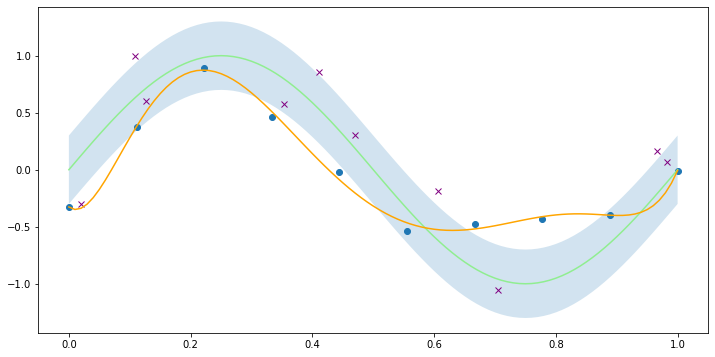

In [60]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_data, y_data, 'o')
plt.plot(x_test, y_test, 'x', color="purple")
ax.plot(x, y_true, '-', color="lightgreen")
ax.fill_between(x, y_upper, y_lower, alpha=0.2)
ax.plot(x, y_predicted, "-", color="orange")

### Regularized Least Squares (Ridge Regression)

### $L(x,w) = \frac{1}{2}\left(\mathbb{w}\cdot \mathbb{\Phi(x) - \hat{y}} \right)^2 + \frac{\lambda}{2} \cdot \mathbb{w}^T \mathbb{w}$

### $\dfrac{\partial L(x,w)}{\partial w} = \left(\mathbb{w}\cdot \mathbb{\Phi - \hat{\mathbb{y}}} \right) \cdot \Phi + \lambda \cdot \mathbb{w} = \Phi\Phi^T \mathbb{w} + \lambda \cdot \mathbb{w} - \Phi \hat{\mathbb{y}}  \overset{!}{=} 0 $

### $\Rightarrow w = \left(\Phi\Phi^T + \lambda \cdot \mathbb{I} \right)^{-1}\Phi \hat{y} $

In [61]:
lmbda = 1e-03
W2 = np.linalg.inv(X_data.T @ X_data + lmbda*np.eye(M,M)) @ X_data.T @ y_data

In [62]:
W2

array([ -3.58223544,  -0.4892251 ,   2.59104259,   4.73941283,
         4.2012792 ,  -1.40589232, -11.00828731,   5.04693681,
        -0.08751701])

In [63]:
W2, np.linalg.norm(W2)

(array([ -3.58223544,  -0.4892251 ,   2.59104259,   4.73941283,
          4.2012792 ,  -1.40589232, -11.00828731,   5.04693681,
         -0.08751701]), 14.44078209956272)

In [64]:
np.sqrt(np.power(W2, 2).sum())

14.440782099562721

In [65]:
y_data_pred2 = X_data @ W2
y_predicted2 = X @ W2
trainerr =  np.sum(np.power(y_data - y_data_pred2, 2)) / N_data
X_test = np.vander(x_test, 9)
y_test_pred2 = X_test @ W2
testerr=  np.sum(np.power(y_test - y_test_pred2, 2)) / N_test 

In [66]:
trainerr

0.03623387454654487

In [67]:
testerr

0.1484578929087404

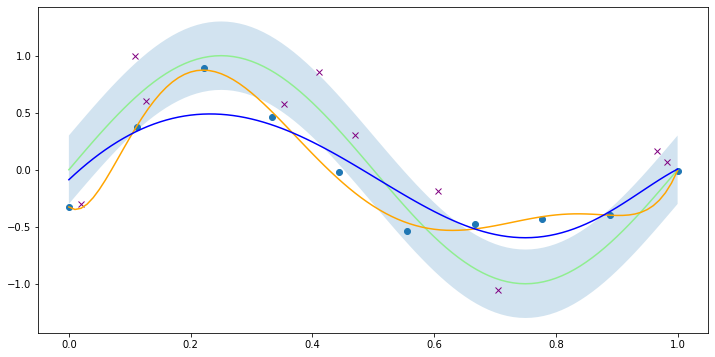

In [68]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_data, y_data, 'o')
plt.plot(x_test, y_test, 'x', color="purple")
ax.plot(x, y_true, '-', color="lightgreen")
ax.fill_between(x, y_upper, y_lower, alpha=0.2)
ax.plot(x, y_predicted, "-", color="orange")
ax.plot(x, y_predicted2, "-", color="blue")

In [69]:
y_test_pred2 = X_data @ W2
np.sum(np.power(y_test - y_test_pred2, 2)) / N_test 

0.3319192837671937

### Can you Create a Plot of the Effect of Lambda on the train and test Errors?

In [70]:
# insert your own code ...

In [71]:
lambdaarr = np.linspace(0, 1e-02, num=11)
sizeofarr = len(lambdaarr)
wei = []
train_err = []
test_err = []
for i in lambdaarr:
    W3 = np.linalg.inv(X_data.T @ X_data + i*np.eye(M,M)) @ X_data.T @ y_data
    wei.append(W3)
    y_data_pred3 = X_data @ W3
    train_err.append( np.sum(np.power(y_data - y_data_pred3, 2)) / N_data )

    

    y_test_pred3 = X_test @ W3
    test_err.append( np.sum(np.power(y_test - y_test_pred3, 2)) / N_test )
    

In [72]:
lambdaarr

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 ])

In [73]:
train_err

[0.0014452063781048223,
 0.03623387454654487,
 0.05071900123851417,
 0.06044065828685542,
 0.067267015060394,
 0.07231512550065389,
 0.07621380510449777,
 0.07933239950306945,
 0.08189916837590325,
 0.08406178810815822,
 0.08591962223777705]

In [74]:
test_err

[0.20123235598249073,
 0.1484578929087404,
 0.16609132118436193,
 0.17759509336134166,
 0.18582639927158567,
 0.192137780351432,
 0.19722463030618426,
 0.20147756818786883,
 0.20513247604900556,
 0.20834033761378468,
 0.21120249817425824]

Text(0, 0.5, 'Mean Squared Error (MSE)')

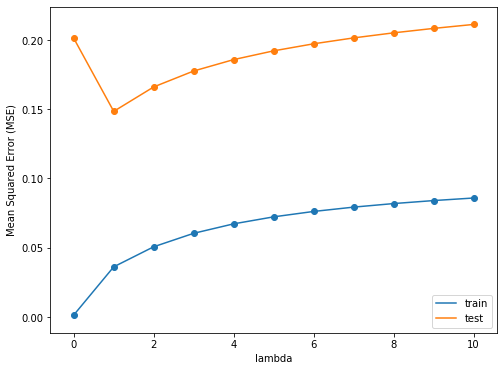

In [75]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(0, sizeofarr), train_err, label="train")
ax.plot(np.arange(0, sizeofarr), test_err, label="test")
ax.scatter(np.arange(0, sizeofarr), train_err)
ax.scatter(np.arange(0, sizeofarr), test_err)
ax.legend()
ax.set_xlabel("lambda")
ax.set_ylabel("Mean Squared Error (MSE)")